In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as md
from datetime import datetime
import math 
from scipy.stats import norm

In [21]:
df = pd.read_csv("rtLS-1640084388")
df['UTC'] = pd.to_datetime(df['time'], unit="s")
df = df.reset_index(drop=True)
del df["#"]
df.head()

,time,counts,cosmic,0,1,2,3,4,5,6,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,UTC
0,1640041198,694,28,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2021-12-20 22:59:58
1,1640041199,703,22,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2021-12-20 22:59:59
2,1640041200,733,38,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2021-12-20 23:00:00
3,1640041201,682,31,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2021-12-20 23:00:01
4,1640041202,732,29,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2021-12-20 23:00:02


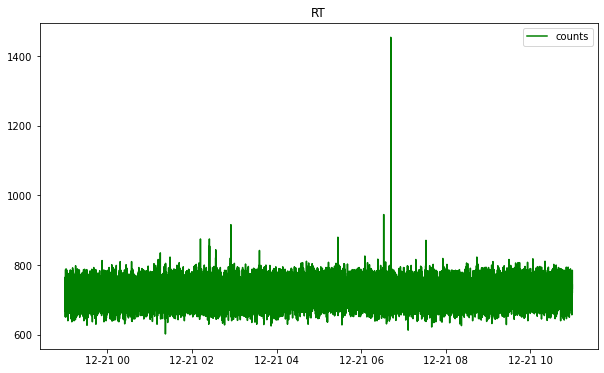

In [23]:
plt.rcParams["figure.figsize"] = [10,6]
plt.plot(df['UTC'],df['counts'],'g-',label="counts")
plt.title('RT')
plt.legend()
plt.show()

In [24]:
stripped_dataframe = df[df["UTC"] > pd.to_datetime("2021-12-21 1:30:00")].reset_index(drop=True)
stripped_dataframe = stripped_dataframe[stripped_dataframe["UTC"] < pd.to_datetime("2021-12-21 3:30:00")].reset_index(drop=True)
stripped_dataframe.head()

,time,counts,cosmic,0,1,2,3,4,5,6,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,UTC
0,1640050201,686,22,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2021-12-21 01:30:01
1,1640050202,663,20,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2021-12-21 01:30:02
2,1640050203,692,35,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2021-12-21 01:30:03
3,1640050210,765,29,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2021-12-21 01:30:10
4,1640050217,726,23,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2021-12-21 01:30:17


In [38]:
def detection(measuring, m, event):
    # measuring -- measuring data
    # m -- window width
    # event -- (maximum) number of events to find
    N=len(measuring)
    S=np.zeros(N-m)
    lam=np.mean(measuring)
    ONE = lam* np.ones(N)
    
    for udal in range(event):
        for i in range (N-m):
            S[i]=np.sum(measuring[i:i+m])
        ndetect=np.argmax(S)
        print('event interval')
        print(ndetect,ndetect+m)
        mu=S[ndetect]/m
        #print('lam, mu')
        #print(lam, mu)

        #definition of the right border of the event
        tau=mu/lam
        #NN=10000
        NN = N - ndetect
        TT=np.zeros(NN)
        Summ=0
        NNp=ndetect+NN
        for i in range(ndetect, NNp):
            j=i+1-ndetect
            Summ+=measuring[i]
            TT[j-1]=j*lam*(1-tau)+Summ*math.log(tau)
        tkon=ndetect+np.argmax(TT)

        #definition of the left border of the event
        #NN=10000
        NN=ndetect
        TTT=np.zeros(NN)
        Summ=0
        for i in range(NN):
            j=ndetect+m-i
            Summ+=measuring[j]
            TTT[i]=i*lam*(1-tau)+Summ*math.log(tau)
        tnac=ndetect+m-np.argmax(TTT)
        print('event boundaries')
        print(tnac, tkon)

        #impruving precision of parameter mu
        #mu = np.mean(measuring[tnac:tkon+1])
        print('lam, mu')
        print(lam, mu)
        muN = mu*(tkon-tnac+1)
        lamN = lam*(tkon-tnac+1)
        parg=(muN-lamN)/math.sqrt(lamN)
        print("argument p", parg)
        pudalost = norm.cdf(parg)

        ONE[tnac:tkon] = mu
        measuring[tnac:tkon] = lam
        print("number of particles without an event, number of particles during an event, beginning and end of the interval, probability of an event, ratio of number of particles")
        print(lam, mu, tnac, tkon, pudalost, mu/lam)
        print()
    return(ONE)


In [39]:
ppp1 = stripped_dataframe['counts'].to_numpy() 
ppp = 0+ppp1  
# ppp -- convert 'counts' to array

In [40]:
rezultDetection = detection(ppp,50,3)
#input: incoming sequence of observations (blue on the graph), window width and number of detected events
#output: piecewise-constant sequence (in red on the graph)

event interval
3767 3817
event boundaries
3762 3816
lam, mu
716.135448700028 762.94
argument p 12.970951784761471
number of particles without an event, number of particles during an event, beginning and end of the interval, probability of an event, ratio of number of particles
716.135448700028 762.94 3762 3816 1.0 1.0653571211771942

event interval
5065 5115
event boundaries
5066 5111
lam, mu
716.135448700028 741.26
argument p 6.367656746025313
number of particles without an event, number of particles during an event, beginning and end of the interval, probability of an event, ratio of number of particles
716.135448700028 741.26 5066 5111 0.9999999999040311 1.0350835185516645

event interval
3247 3297
event boundaries
3255 3270
lam, mu
716.135448700028 738.14
argument p 3.289083678259349
number of particles without an event, number of particles during an event, beginning and end of the interval, probability of an event, ratio of number of particles
716.135448700028 738.14 3255 3270 0.9

In [41]:
stripped_dataframe["fitted_prediction"] = rezultDetection


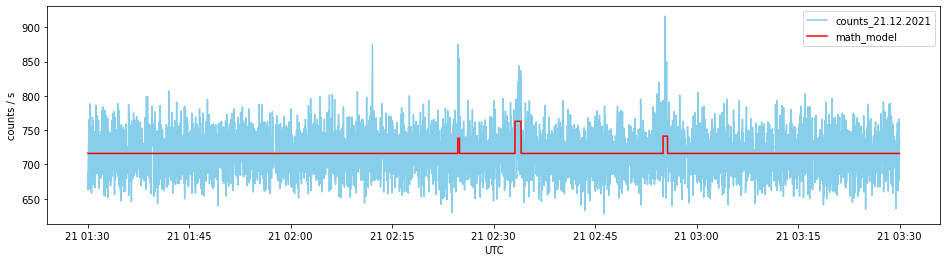

In [42]:
plt.rcParams["figure.figsize"] = [16,4]
plt.plot(stripped_dataframe["UTC"], stripped_dataframe["counts"], '-', label="counts_21.12.2021", color = 'skyblue')
plt.plot(stripped_dataframe["UTC"], stripped_dataframe["fitted_prediction"],'-', label="math_model", color = 'red')
#plt.title('graf castic 18.01.2023')
plt.xlabel('UTC')
plt.ylabel('counts / s')
plt.legend()
#plt.ylim(0,850)
#plt.savefig("event_18.1.2023.jpg", dpi=150)
plt.show()
